<a href="https://colab.research.google.com/github/guilhermelaviola/IntegratingPracticesInDataScienceForBusiness/blob/main/Class08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Metrics for Classification**
Business model classification is crucial for evaluating the effectiveness of models. Machine learning algorithms, such as linear regression, logistic regression, and decision trees, are used to construct models based on data quality and model suitability. Analysts verify the model's suitability for available data, impacting evaluation metrics like accuracy. In practice, classification algorithms like XGBoost Classifier are used to identify wine types based on criteria like acidity and origin. Data is imported and read using pandas, identifying target and predictor variables, and eliminating unnecessary ones to focus on relevant ones.

In [1]:
# Importing all the necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from xgboost import XGBClassifier

In [2]:
# Loading a dataset with fictional data:
url = 'https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv'
df = pd.read_csv(url)

df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
# Pre-processamento dos dados
df = df.dropna() # Removing null values
X = df.drop('Wine', axis=1) # Predictor variables
y = df['Wine'] - 1 # Target variable - Subtracting 1 to make labels 0-indexed

# Splitting the dataset into training and test data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42)

# Data standardization:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# Creating the XGBoost Classification Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Training the model:
xgb_model.fit(X_train, y_train)

# Predictions on the test data:
predictions = xgb_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [01:34:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [5]:
# Evaluating the model:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

# Displaying the results:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, predictions)}')
print(f'Classification Report:\n{classification_report(y_test, predictions)}')

Accuracy: 0.9444444444444444
Precision: 0.9513888888888888
Recall: 0.9444444444444444
F1-Score: 0.9448559670781892
Confusion Matrix:
[[13  1  0]
 [ 0 14  0]
 [ 0  1  7]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.88      1.00      0.93        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



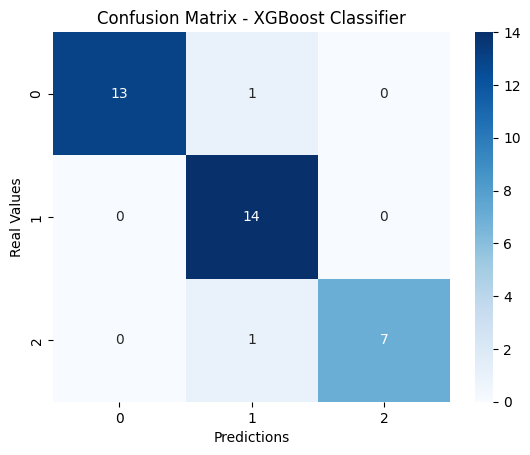

In [6]:
# Visualizing the Confusion Matrix:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost Classifier')
plt.xlabel('Predictions')
plt.ylabel('Real Values')
plt.show()